In [ ]:
# logica de programação

# 2 Analise: Compilar os dados para validar a representatividade de cada municipio da base do IBGE e extrapolar essa porcetagem paras as bases da Conab

# Tarefas:
# Baixar o banco de dados utilizando modelos usados na analise 1
# Separar estados correlacionados a cada muncipio apenas para safra 2021
# Buscar os dados da safra 2021/22 da Conab para servir de referencia a extrapolação dos dados do IBGE
# Compilar as duas informações em 1 dataframe
# Gerar informações

In [1]:
import pandas as pd
import numpy as np

In [53]:
# Copiando o codigo da analise 1 do IBGE

#Importando a planilha Excel do IBGE
ibge= pd.read_excel('tabela1612.xlsx')
ibge.drop(ibge.loc[(ibge['Tabela 1612 - Área plantada, área colhida, quantidade produzida, rendimento médio e valor da produção das lavouras temporárias'] == 'MI') | (ibge['Tabela 1612 - Área plantada, área colhida, quantidade produzida, rendimento médio e valor da produção das lavouras temporárias'] == 'ME')].index, inplace=True)

display(ibge)

,"Tabela 1612 - Área plantada, área colhida, quantidade produzida, rendimento médio e valor da produção das lavouras temporárias",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Variável - Área plantada,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nível,"Brasil, Unidade da Federação, Município, Mesor...",Ano x Produto das lavouras temporárias,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2019,NaN,2020,NaN,2021,NaN
3,NaN,NaN,Soja (em grão),NaN,Soja (em grão),NaN,Soja (em grão),NaN
4,BR,Brasil,35944094,Hectares,37205462,Hectares,39185745,Hectares
...,...,...,...,...,...,...,...,...
5592,MU,Vicentinópolis (GO),20400,Hectares,21000,Hectares,24500,Hectares
5593,MU,Vila Boa (GO),250,Hectares,250,Hectares,1800,Hectares
5594,MU,Vila Propício (GO),16500,Hectares,16700,Hectares,22950,Hectares
5595,MU,Brasília (DF),75000,Hectares,74500,Hectares,80000,Hectares


In [54]:
# Renomeando o cabecalho e dropando linhas desnecessarias

new_columns = {'Unnamed: 1': 'Cidade', 
               'Unnamed: 2': '2019',
               'Unnamed: 3': 'Unidade de medida',
               'Unnamed: 4': '2020',
               'Unnamed: 5': 'Unidade de medida',
               'Unnamed: 6': '2021',
               'Unnamed: 7': 'Unidade de medida'}

area_plantada_ibge = ibge.rename(columns=new_columns)

area_plantada_ibge.head(35)

,"Tabela 1612 - Área plantada, área colhida, quantidade produzida, rendimento médio e valor da produção das lavouras temporárias",Cidade,2019,Unidade de medida,2020,Unidade de medida,2021,Unidade de medida
0,Variável - Área plantada,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nível,"Brasil, Unidade da Federação, Município, Mesor...",Ano x Produto das lavouras temporárias,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2019,NaN,2020,NaN,2021,NaN
3,NaN,NaN,Soja (em grão),NaN,Soja (em grão),NaN,Soja (em grão),NaN
4,BR,Brasil,35944094,Hectares,37205462,Hectares,39185745,Hectares
5,UF,Rondônia,344551,Hectares,392642,Hectares,400459,Hectares
6,UF,Acre,1660,Hectares,3280,Hectares,6185,Hectares
7,UF,Amazonas,2500,Hectares,2700,Hectares,3000,Hectares
8,UF,Roraima,39930,Hectares,49800,Hectares,57277,Hectares
9,UF,Pará,577764,Hectares,643267,Hectares,753781,Hectares


In [55]:
# não há necessidade dos dados da coluna 1,3,4 e 5 assim como das linhas até 32. Excluir.

area_plantada_ibge1 = area_plantada_ibge.drop(index=range(0,33), axis=0)
area_plantada_ibge1.drop(['2019', 'Unidade de medida','2020', 	
                          'Tabela 1612 - Área plantada, área colhida, quantidade produzida, rendimento médio e valor da produção das lavouras temporárias']
                         , axis=1 , inplace=True)
area_plantada_ibge1 = area_plantada_ibge.drop(index=6291, axis=0)

display(area_plantada_ibge1)

,"Tabela 1612 - Área plantada, área colhida, quantidade produzida, rendimento médio e valor da produção das lavouras temporárias",Cidade,2019,Unidade de medida,2020,Unidade de medida,2021,Unidade de medida
0,Variável - Área plantada,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nível,"Brasil, Unidade da Federação, Município, Mesor...",Ano x Produto das lavouras temporárias,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2019,NaN,2020,NaN,2021,NaN
3,NaN,NaN,Soja (em grão),NaN,Soja (em grão),NaN,Soja (em grão),NaN
4,BR,Brasil,35944094,Hectares,37205462,Hectares,39185745,Hectares
...,...,...,...,...,...,...,...,...
5591,MU,Vianópolis (GO),40000,Hectares,41000,Hectares,41000,Hectares
5592,MU,Vicentinópolis (GO),20400,Hectares,21000,Hectares,24500,Hectares
5593,MU,Vila Boa (GO),250,Hectares,250,Hectares,1800,Hectares
5594,MU,Vila Propício (GO),16500,Hectares,16700,Hectares,22950,Hectares


In [56]:
area_plantada_ibge1 = area_plantada_ibge.drop(index=range(0,33), axis=0)
area_plantada_ibge1.drop(['2019', 'Unidade de medida','2020', 	
                          'Tabela 1612 - Área plantada, área colhida, quantidade produzida, rendimento médio e valor da produção das lavouras temporárias']
                         , axis=1 , inplace=True)

display(area_plantada_ibge1)

,Cidade,2021
33,Alta Floresta D'Oeste (RO),1072
34,Ariquemes (RO),6979
35,Cabixi (RO),27705
36,Cacoal (RO),2160
37,Cerejeiras (RO),36430
...,...,...
5592,Vicentinópolis (GO),24500
5593,Vila Boa (GO),1800
5594,Vila Propício (GO),22950
5595,Brasília (DF),80000


In [57]:
area_plantada_ibge1.drop(6291, inplace=True)

display(area_plantada_ibge1)

,Cidade,2021
33,Alta Floresta D'Oeste (RO),1072
34,Ariquemes (RO),6979
35,Cabixi (RO),27705
36,Cacoal (RO),2160
37,Cerejeiras (RO),36430
...,...,...
5591,Vianópolis (GO),41000
5592,Vicentinópolis (GO),24500
5593,Vila Boa (GO),1800
5594,Vila Propício (GO),22950


In [58]:
# Separar a cidade e o estado em duas colunas
area_plantada_ibge1[['Cidade', 'Estado']] = area_plantada_ibge1['Cidade'].str.split("(", expand=True)
area_plantada_ibge1['Sigla'] = area_plantada_ibge1['Estado'].str.extract(r'([A-Z]{2})')
area_plantada_ibge1['Estado'] = area_plantada_ibge1['Estado'].str.replace(r'\(|\)|[A-Z]{2}', '')
area_plantada_ibge1['Cidade'] = area_plantada_ibge1['Cidade'].str.strip()
area_plantada_ibge1['Estado'] = area_plantada_ibge1['Estado'].str.strip()

display(area_plantada_ibge1)

C:\Users\PEDRO\AppData\Local\Temp\ipykernel_3780\3999825676.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  area_plantada_ibge1['Estado'] = area_plantada_ibge1['Estado'].str.replace(r'\(|\)|[A-Z]{2}', '')


,Cidade,2021,Estado,Sigla
33,Alta Floresta D'Oeste,1072,,RO
34,Ariquemes,6979,,RO
35,Cabixi,27705,,RO
36,Cacoal,2160,,RO
37,Cerejeiras,36430,,RO
...,...,...,...,...
5591,Vianópolis,41000,,GO
5592,Vicentinópolis,24500,,GO
5593,Vila Boa,1800,,GO
5594,Vila Propício,22950,,GO


In [59]:
# Transformar para float os numeros

area_plantada_ibge1['2021'] = area_plantada_ibge1['2021'].astype(float).round(0)

display(area_plantada_ibge1)

ValueError: could not convert string to float: '-'

In [60]:
# Fazer um groupby para consolidar a area planta poder estado e definir para fazer a porcentagem de representatividade

group = area_plantada_ibge1[['Sigla', '2021']].groupby('Sigla').sum()

print(group)

Empty DataFrame
Columns: []
Index: [AC, AL, AM, AP, BA, CE, DF, ES, GO, MA, MG, MS, MT, PA, PB, PE, PI, PR, RJ, RN, RO, RR, RS, SC, SE, SP, TO]


C:\Users\PEDRO\AppData\Local\Temp\ipykernel_3780\2787875343.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group = area_plantada_ibge1[['Sigla', '2021']].groupby('Sigla').sum()


In [62]:
area_plantada_ibge1.head(500)

,Cidade,2021,Estado,Sigla
33,Alta Floresta D'Oeste,1072,,RO
34,Ariquemes,6979,,RO
35,Cabixi,27705,,RO
36,Cacoal,2160,,RO
37,Cerejeiras,36430,,RO
...,...,...,...,...
528,Cândido Mendes,-,,MA
529,Cantanhede,-,,MA
530,Capinzal do Norte,-,,MA
531,Carolina,27040,,MA


In [64]:
# há linhas dentro de 2021 que estão com '-' precisamos zerar essas linhas usando a função loc
area_plantada_ibge1.loc[area_plantada_ibge1['2021'] == '-', '2021'] = 0
area_plantada_ibge1.head(500)

,Cidade,2021,Estado,Sigla
33,Alta Floresta D'Oeste,1072,,RO
34,Ariquemes,6979,,RO
35,Cabixi,27705,,RO
36,Cacoal,2160,,RO
37,Cerejeiras,36430,,RO
...,...,...,...,...
528,Cândido Mendes,0,,MA
529,Cantanhede,0,,MA
530,Capinzal do Norte,0,,MA
531,Carolina,27040,,MA


In [65]:
# Transformar para float os numeros

area_plantada_ibge1['2021'] = area_plantada_ibge['2021'].astype(float).round(0)

display(area_plantada_ibge1)

ValueError: could not convert string to float: 'Soja (em grão)'

In [66]:
# Transformar para float os numeros
area_plantada_ibge1.loc[area_plantada_ibge1['2021'] == 'Soja (em grão)', '2021'] = 0

area_plantada_ibge1['2021'] = area_plantada_ibge1['2021'].astype(float).round(0)

display(area_plantada_ibge1)

ValueError: could not convert string to float: '...'

In [67]:
# Transformar para float os numeros
area_plantada_ibge1.loc[area_plantada_ibge1['2021'] == '...', '2021'] = 0

area_plantada_ibge1['2021'] = area_plantada_ibge1['2021'].astype(float).round(0)

display(area_plantada_ibge1)

,Cidade,2021,Estado,Sigla
33,Alta Floresta D'Oeste,1072.0,,RO
34,Ariquemes,6979.0,,RO
35,Cabixi,27705.0,,RO
36,Cacoal,2160.0,,RO
37,Cerejeiras,36430.0,,RO
...,...,...,...,...
5591,Vianópolis,41000.0,,GO
5592,Vicentinópolis,24500.0,,GO
5593,Vila Boa,1800.0,,GO
5594,Vila Propício,22950.0,,GO


In [69]:
# Agora com os dados arrumados podemos fazer o groupby

group = area_plantada_ibge1[['Sigla', '2021']].groupby('Sigla').sum()

print(group)

             2021
Sigla            
AC         6185.0
AL         3312.0
AM         3000.0
AP         6715.0
BA      1699965.0
CE         1414.0
DF        80000.0
ES            0.0
GO      3855277.0
MA      1023541.0
MG      1935260.0
MS      3377042.0
MT     10461712.0
PA       753781.0
PB            0.0
PE          300.0
PI       832063.0
PR      5521183.0
RJ            0.0
RN            0.0
RO       400459.0
RR        57277.0
RS      6107620.0
SC       688980.0
SE            0.0
SP      1199351.0
TO      1171308.0


In [70]:
# Unificando o group e a planilha do ibge

group = area_plantada_ibge1[['Sigla', '2021']].groupby('Sigla').sum()
area_plantada_por_sigla = pd.merge(area_plantada_ibge1, group, on='Sigla', suffixes=('', '_total'))
area_plantada_por_sigla['Porcentagem'] = (area_plantada_por_sigla['2021'] / area_plantada_por_sigla['2021_total']) * 100

display(area_plantada_por_sigla[['Sigla', 'Cidade', 'Estado', '2021', '2021_total', 'Porcentagem']])


,Sigla,Cidade,Estado,2021,2021_total,Porcentagem
0,RO,Alta Floresta D'Oeste,,1072.0,400459.0,0.267693
1,RO,Ariquemes,,6979.0,400459.0,1.742750
2,RO,Cabixi,,27705.0,400459.0,6.918311
3,RO,Cacoal,,2160.0,400459.0,0.539381
4,RO,Cerejeiras,,36430.0,400459.0,9.097061
...,...,...,...,...,...,...
5558,GO,Vianópolis,,41000.0,3855277.0,1.063477
5559,GO,Vicentinópolis,,24500.0,3855277.0,0.635493
5560,GO,Vila Boa,,1800.0,3855277.0,0.046689
5561,GO,Vila Propício,,22950.0,3855277.0,0.595288


In [71]:
# converter para Excel
area_plantada_por_sigla.to_excel('IBGE representatividade.xlsx')

In [72]:
# agora vamos puxar os dados da Conab da safra 21/22
# Importando o dado em formato excel
conab_soja= pd.read_excel('conab_soja.xlsx')

display(conab_soja)

,ano_agricola,dsc_safra_previsao,uf,produto,id_produto,area_plantada_mil_ha,producao_mil_t,produtividade_mil_ha_mil_t
0,1976/77,UNICA,AL,ALGODAO EM PLUMA,4586,99.3,6.0,0.1
1,1976/77,UNICA,BA,ALGODAO EM PLUMA,4586,123.4,7.0,0.1
2,1976/77,UNICA,CE,ALGODAO EM PLUMA,4586,1296.0,70.0,0.1
3,1976/77,UNICA,GO,ALGODAO EM PLUMA,4586,73.1,28.2,0.4
4,1976/77,UNICA,MA,ALGODAO EM PLUMA,4586,44.4,2.0,0.0
...,...,...,...,...,...,...,...,...
11627,2022,UNICA,RS,TRITICALE,4753,5.8,18.7,3.2
11628,2022,UNICA,SC,TRITICALE,4753,0.0,0.0,0.0
11629,2022,UNICA,SE,TRITICALE,4753,0.0,0.0,0.0
11630,2022,UNICA,SP,TRITICALE,4753,1.8,4.9,2.7


In [73]:
# Filtrando linhas que apresentem apenas soja

filtro_produto = conab_soja['produto'].str.contains('SOJA', case=False)
filtro_ano = conab_soja['ano_agricola'] >= '2021/22'
novo_df = conab_soja[filtro_produto & filtro_ano]

display(novo_df)

,ano_agricola,dsc_safra_previsao,uf,produto,id_produto,area_plantada_mil_ha,producao_mil_t,produtividade_mil_ha_mil_t
10315,2021/22,UNICA,AC,SOJA,4744,6.1,20.4,3.3
10316,2021/22,UNICA,AL,SOJA,4744,2.3,6.9,3.0
10317,2021/22,UNICA,AM,SOJA,4744,4.5,13.5,3.0
10318,2021/22,UNICA,AP,SOJA,4744,6.5,17.2,2.6
10319,2021/22,UNICA,BA,SOJA,4744,1893.2,7385.4,3.9
10320,2021/22,UNICA,CE,SOJA,4744,0.0,0.0,0.0
10321,2021/22,UNICA,DF,SOJA,4744,84.2,313.2,3.7
10322,2021/22,UNICA,ES,SOJA,4744,0.0,0.0,0.0
10323,2021/22,UNICA,GO,SOJA,4744,4393.6,17389.9,4.0
10324,2021/22,UNICA,MA,SOJA,4744,1075.1,3573.6,3.3


In [74]:
# Criando uma coluna com o valor final de area plantada

novo_df.loc[:, 'area_plantada_ha'] = novo_df['area_plantada_mil_ha'] * 1000

display(novo_df)

C:\Users\PEDRO\AppData\Local\Temp\ipykernel_3780\3922253293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo_df.loc[:, 'area_plantada_ha'] = novo_df['area_plantada_mil_ha'] * 1000


,ano_agricola,dsc_safra_previsao,uf,produto,id_produto,area_plantada_mil_ha,producao_mil_t,produtividade_mil_ha_mil_t,area_plantada_ha
10315,2021/22,UNICA,AC,SOJA,4744,6.1,20.4,3.3,6100.0
10316,2021/22,UNICA,AL,SOJA,4744,2.3,6.9,3.0,2300.0
10317,2021/22,UNICA,AM,SOJA,4744,4.5,13.5,3.0,4500.0
10318,2021/22,UNICA,AP,SOJA,4744,6.5,17.2,2.6,6500.0
10319,2021/22,UNICA,BA,SOJA,4744,1893.2,7385.4,3.9,1893200.0
10320,2021/22,UNICA,CE,SOJA,4744,0.0,0.0,0.0,0.0
10321,2021/22,UNICA,DF,SOJA,4744,84.2,313.2,3.7,84200.0
10322,2021/22,UNICA,ES,SOJA,4744,0.0,0.0,0.0,0.0
10323,2021/22,UNICA,GO,SOJA,4744,4393.6,17389.9,4.0,4393600.0
10324,2021/22,UNICA,MA,SOJA,4744,1075.1,3573.6,3.3,1075100.0


In [75]:
# vamos dropar informações não relevantes como as colunas dsc_safra_previsao, id_produto, producao_mil_t e produtividade_mil_ha_mil_t

novo_df = novo_df.drop(columns=['dsc_safra_previsao', 'id_produto', 'producao_mil_t', 'produtividade_mil_ha_mil_t'])

display(novo_df)

,ano_agricola,uf,produto,area_plantada_mil_ha,area_plantada_ha
10315,2021/22,AC,SOJA,6.1,6100.0
10316,2021/22,AL,SOJA,2.3,2300.0
10317,2021/22,AM,SOJA,4.5,4500.0
10318,2021/22,AP,SOJA,6.5,6500.0
10319,2021/22,BA,SOJA,1893.2,1893200.0
10320,2021/22,CE,SOJA,0.0,0.0
10321,2021/22,DF,SOJA,84.2,84200.0
10322,2021/22,ES,SOJA,0.0,0.0
10323,2021/22,GO,SOJA,4393.6,4393600.0
10324,2021/22,MA,SOJA,1075.1,1075100.0


In [76]:
# eliminando 2022/23 da lista

conab_area= novo_df.drop(index=range(10342,10369), axis=0)

display(conab_area)

,ano_agricola,uf,produto,area_plantada_mil_ha,area_plantada_ha
10315,2021/22,AC,SOJA,6.1,6100.0
10316,2021/22,AL,SOJA,2.3,2300.0
10317,2021/22,AM,SOJA,4.5,4500.0
10318,2021/22,AP,SOJA,6.5,6500.0
10319,2021/22,BA,SOJA,1893.2,1893200.0
10320,2021/22,CE,SOJA,0.0,0.0
10321,2021/22,DF,SOJA,84.2,84200.0
10322,2021/22,ES,SOJA,0.0,0.0
10323,2021/22,GO,SOJA,4393.6,4393600.0
10324,2021/22,MA,SOJA,1075.1,1075100.0


In [77]:
# Incluindo a area_plantada_ha da conab na area_plantada_por_sigla

conab_area_relevante = conab_area[['uf', 'area_plantada_ha']]
conab_area_relevante = conab_area_relevante.rename(columns={'uf': 'Sigla'})
area_plantada_por_sigla = area_plantada_por_sigla.merge(conab_area_relevante, on='Sigla')

display(area_plantada_por_sigla)

,Cidade,2021,Estado,Sigla,2021_total,Porcentagem,area_plantada_ha
0,Alta Floresta D'Oeste,1072.0,,RO,400459.0,0.267693,491700.0
1,Ariquemes,6979.0,,RO,400459.0,1.742750,491700.0
2,Cabixi,27705.0,,RO,400459.0,6.918311,491700.0
3,Cacoal,2160.0,,RO,400459.0,0.539381,491700.0
4,Cerejeiras,36430.0,,RO,400459.0,9.097061,491700.0
...,...,...,...,...,...,...,...
5558,Vianópolis,41000.0,,GO,3855277.0,1.063477,4393600.0
5559,Vicentinópolis,24500.0,,GO,3855277.0,0.635493,4393600.0
5560,Vila Boa,1800.0,,GO,3855277.0,0.046689,4393600.0
5561,Vila Propício,22950.0,,GO,3855277.0,0.595288,4393600.0


In [78]:
# Multiplicar a area plantada pela porcentagem

area_plantada_por_sigla['Porcentagem'] = area_plantada_por_sigla['Porcentagem'] / 100
area_plantada_por_sigla['Nova representatividade-Conab'] = area_plantada_por_sigla['Porcentagem'] * area_plantada_por_sigla['area_plantada_ha']


display(area_plantada_por_sigla)

,Cidade,2021,Estado,Sigla,2021_total,Porcentagem,area_plantada_ha,Nova representatividade-Conab
0,Alta Floresta D'Oeste,1072.0,,RO,400459.0,0.002677,491700.0,1316.245608
1,Ariquemes,6979.0,,RO,400459.0,0.017428,491700.0,8569.102705
2,Cabixi,27705.0,,RO,400459.0,0.069183,491700.0,34017.336357
3,Cacoal,2160.0,,RO,400459.0,0.005394,491700.0,2652.136673
4,Cerejeiras,36430.0,,RO,400459.0,0.090971,491700.0,44730.249539
...,...,...,...,...,...,...,...,...
5558,Vianópolis,41000.0,,GO,3855277.0,0.010635,4393600.0,46724.943500
5559,Vicentinópolis,24500.0,,GO,3855277.0,0.006355,4393600.0,27921.002823
5560,Vila Boa,1800.0,,GO,3855277.0,0.000467,4393600.0,2051.338983
5561,Vila Propício,22950.0,,GO,3855277.0,0.005953,4393600.0,26154.572032


In [79]:
area_plantada_por_sigla.to_excel('Analise 2.xlsx')

In [80]:
display(area_plantada_por_sigla)

,Cidade,2021,Estado,Sigla,2021_total,Porcentagem,area_plantada_ha,Nova representatividade-Conab
0,Alta Floresta D'Oeste,1072.0,,RO,400459.0,0.002677,491700.0,1316.245608
1,Ariquemes,6979.0,,RO,400459.0,0.017428,491700.0,8569.102705
2,Cabixi,27705.0,,RO,400459.0,0.069183,491700.0,34017.336357
3,Cacoal,2160.0,,RO,400459.0,0.005394,491700.0,2652.136673
4,Cerejeiras,36430.0,,RO,400459.0,0.090971,491700.0,44730.249539
...,...,...,...,...,...,...,...,...
5558,Vianópolis,41000.0,,GO,3855277.0,0.010635,4393600.0,46724.943500
5559,Vicentinópolis,24500.0,,GO,3855277.0,0.006355,4393600.0,27921.002823
5560,Vila Boa,1800.0,,GO,3855277.0,0.000467,4393600.0,2051.338983
5561,Vila Propício,22950.0,,GO,3855277.0,0.005953,4393600.0,26154.572032


In [82]:
grafico= pd.read_excel("Analise 2.xlsx")
display(grafico)

,Unnamed: 0,Cidade,2021,Sigla,2021_total,Porcentagem,area_plantada_ha,Nova representatividade-Conab,Diferença,Nova porcetagem,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Cidade.1,Porcentagem.1,Nova porcetagem.1
0,0,Alta Floresta D'Oeste,1072,RO,400459,0.002677,491700,1316.245608,244.245608,0.003287,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alta Floresta D'Oeste,0.002677,0.003287
1,1,Ariquemes,6979,RO,400459,0.017428,491700,8569.102705,1590.102705,0.021398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ariquemes,0.017428,0.021398
2,2,Cabixi,27705,RO,400459,0.069183,491700,34017.336357,6312.336357,0.084946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cabixi,0.069183,0.084946
3,3,Cacoal,2160,RO,400459,0.005394,491700,2652.136673,492.136673,0.006623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cacoal,0.005394,0.006623
4,4,Cerejeiras,36430,RO,400459,0.090971,491700,44730.249539,8300.249539,0.111697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cerejeiras,0.090971,0.111697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5558,5558,Vianópolis,41000,GO,3855277,0.010635,4393600,46724.943500,5724.943500,0.012120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vianópolis,0.010635,0.012120
5559,5559,Vicentinópolis,24500,GO,3855277,0.006355,4393600,27921.002823,3421.002823,0.007242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vicentinópolis,0.006355,0.007242
5560,5560,Vila Boa,1800,GO,3855277,0.000467,4393600,2051.338983,251.338983,0.000532,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vila Boa,0.000467,0.000532
5561,5561,Vila Propício,22950,GO,3855277,0.005953,4393600,26154.572032,3204.572032,0.006784,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vila Propício,0.005953,0.006784


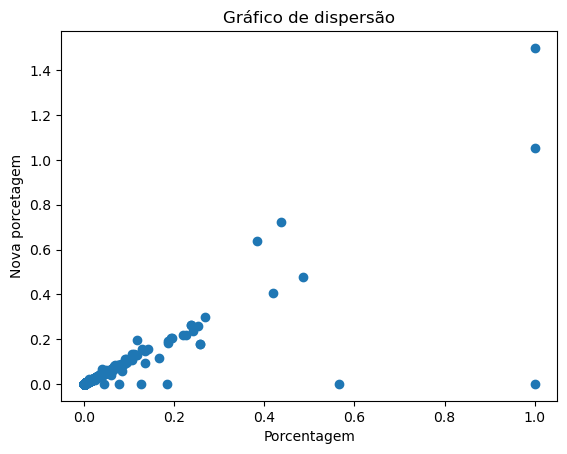

In [83]:
import matplotlib.pyplot as plt

# Selecionando as colunas de interesse
x = grafico['Porcentagem']
y = grafico['Nova porcetagem']

# Criando o gráfico
plt.scatter(x, y)

# Definindo o título e rótulos dos eixos
plt.title('Gráfico de dispersão')
plt.xlabel('Porcentagem')
plt.ylabel('Nova porcetagem')

# Exibindo o gráfico
plt.show()
